In [40]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import pandas as pd
import seaborn as sns

### Global variables

In [42]:
from global_variables import *
from data_preparation import * 
from cost import * 
from cross_validation import *
from performances import * 

methods = ['mse', 'mae', 'log', 'regularized-log', 'ridge-regression']
lambda_1 = 3

# Load the data

We map the 'b' and 's' labels to 0 and 1 respectively.

In [4]:
X, Y = load_data()

In [5]:
print(X.shape, Y.shape)

(250000, 30) (250000,)


## Clean and standardize the features

### Counting the number of invalid datapoints per column

In [6]:
invalids = np.count_nonzero(X == -999, axis=0)
print(invalids)

[ 38114      0      0      0 177457 177457 177457      0      0      0
      0      0 177457      0      0      0      0      0      0      0
      0      0      0  99913  99913  99913 177457 177457 177457      0]


Therefore we get rid of columns [0,4,5,6,12,23,24,25,26,27,28]

In [7]:
X_standardized = clean_and_standardize_features(X)
N = X_standardized.shape[1]

C:\Users\clara\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\clara\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


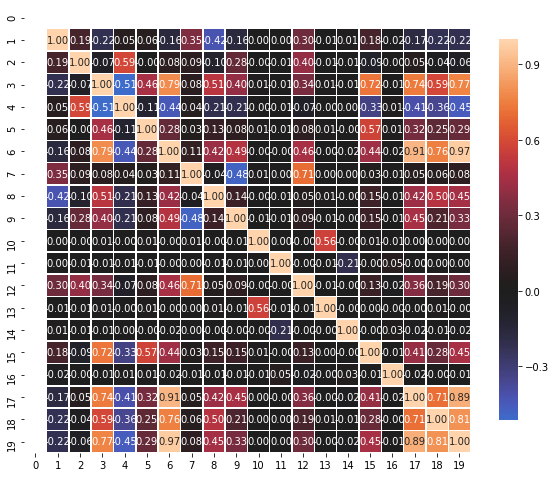

In [8]:
correlation_matrix = np.corrcoef(X_standardized[:10000,:], rowvar=False)
suffix = time.time()
np.savetxt('correlation_matrix_' + str(suffix) + '.csv', correlation_matrix, fmt="%0.2f", delimiter=",", comments='')
correlation_heatmap(X_standardized)

## Methods from lab1 and lab2

We decided to use the sigmoid function: $$S(z) = \frac{1}{1 + e^{-z}}$$ <br />
to map the predicted values to probabilities of the event being a signal(1) rather than background(0) 

We use the cross-entropy cost function for loss computation: 
$$J(\theta) = -\frac{1}{N} * (y^T log(Xw) + (1-y)^T log(1-Xw))$$

In [9]:
def grid_search(y, tx, w0, w1):
    losses = np.zeros((len(w0), len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i][j] = compute_loss(y, tx, np.array([w0[i], w1[j]]))
    return losses

### Additional methods

We label the results <0.5 to -1, and the rest to 1

## Trying the $L_2$ - regularization

In [10]:
lambda_prime = lambda_1 * 2 * N
temp = np.linalg.inv(X_standardized.T@X_standardized + np.identity(N)*lambda_prime)
temp_2 = temp@X_standardized.T
w_L_2 = temp_2@Y

In [11]:
Y_predicted = predict(X_standardized, w_L_2)
Y_labeled = label_results(Y_predicted)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-entropy
evaluate_performance(label_results(Y), Y_labeled)

0.419116


In [12]:
find_best_threshold(Y_predicted, label_results(Y))

threshold is: 0.0
performance is: False
threshold is: 0.01
performance is: False
threshold is: 0.02
performance is: False
threshold is: 0.03
performance is: False
threshold is: 0.04
performance is: False
threshold is: 0.05
performance is: False
threshold is: 0.06
performance is: False
threshold is: 0.07
performance is: False
threshold is: 0.08
performance is: False
threshold is: 0.09
performance is: False
threshold is: 0.1
performance is: False
threshold is: 0.11
performance is: False
threshold is: 0.12
performance is: False
threshold is: 0.13
performance is: False
threshold is: 0.14
performance is: False
threshold is: 0.15
performance is: False
threshold is: 0.16
performance is: False
threshold is: 0.17
performance is: False
threshold is: 0.18
performance is: False
threshold is: 0.19
performance is: False
threshold is: 0.2
performance is: False
threshold is: 0.21
performance is: False
threshold is: 0.22
performance is: False
threshold is: 0.23
performance is: False
threshold is: 0.24


(0.51, True)

## Trying the ridge regression

iter: 1000 loss: 0.157842355934919
[ 4.89525714e-02 -2.11523608e-02 -7.57968509e-04  8.84852552e-03
  3.68235567e-03 -2.90137799e-03  6.02247041e-03 -1.13797816e-02
  1.50547918e-02  1.30593023e-02 -9.39657302e-05 -3.00084007e-04
 -1.68637415e-03  2.66869054e-05  2.64268742e-04 -4.15605097e-04
  4.02715147e-04  4.69166127e-03  5.03767704e-03  4.50295735e-03]


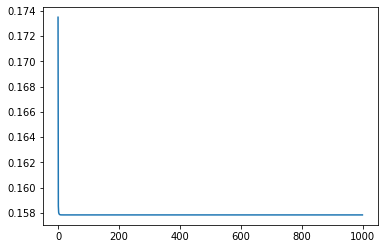

In [13]:
max_iters = 1000
gamma = 0.15
batch_size = 1

method = methods[4]
losses, w_ridge = gradient_descent(Y, X_standardized, np.ones(X_standardized.shape[1]), max_iters, gamma, method, lambda_1)
print(w_ridge)
plt.plot(losses)

In [14]:
Y_predicted = predict(X_standardized, w_ridge)
Y_labeled = label_results(Y_predicted)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-entropy
evaluate_performance(label_results(Y), Y_labeled)

0.671492


In [ ]:
find_best_threshold(Y_predicted, label_results(Y))

threshold is: 0.0
performance is: False
threshold is: 0.01
performance is: False
threshold is: 0.02
performance is: False
threshold is: 0.03
performance is: False
threshold is: 0.04
performance is: False
threshold is: 0.05
performance is: False
threshold is: 0.06
performance is: False
threshold is: 0.07
performance is: False
threshold is: 0.08
performance is: False
threshold is: 0.09
performance is: False
threshold is: 0.1
performance is: False
threshold is: 0.11
performance is: False
threshold is: 0.12
performance is: False
threshold is: 0.13
performance is: False
threshold is: 0.14
performance is: False
threshold is: 0.15
performance is: False
threshold is: 0.16
performance is: False
threshold is: 0.17
performance is: False
threshold is: 0.18
performance is: False
threshold is: 0.19
performance is: False
threshold is: 0.2
performance is: False
threshold is: 0.21
performance is: False
threshold is: 0.22
performance is: False
threshold is: 0.23
performance is: False
threshold is: 0.24


## Trying gradient descent

In [ ]:
max_iters = 100
gamma = 0.01
batch_size = 1

method = methods[2]
losses, w = gradient_descent(Y, X_standardized, np.random.random(X_standardized.shape[1]), max_iters, gamma, method)
print(w)
plt.plot(losses)

In [ ]:
# compare different values of gamma for gradient descent
max_iters = 600
gamma = [0.5, 0.1, 0.15, 0.2, 0.3, 1]
batch_size = 1
whichLoss = 100
which = 100
losses = np.ndarray([len(gamma),1])
w = np.ndarray([len(gamma), X_standardized.shape[1]])
for i in range(len(gamma)):
    loss, wi = gradient_descent(Y, X_standardized, np.random.random(X_standardized.shape[1]), max_iters, gamma[i]) 
    plt.tight_layout()
    plt.subplot(int(str(32)+str(i+1)))
    plt.plot(loss)
    plt.xlabel("# of iterations")
    plt.ylabel("Cost")
    plt.title("Gamma = " + str(gamma[i]))
    print(loss[-1])
    if(loss[-1] < whichLoss):
        whichLoss = loss[-1]
        which = i
    losses[i] = loss[-1]
    w[i,:] = wi

print("smallest cost:" + str(losses[which]) + "at gamma=" + str(gamma[which]))


In [ ]:
try:
    Y_predicted = predict(X_standardized, w)
except:
    Y_predicted = predict(X_standardized, w[which,:])
Y_labeled = label_results(Y_predicted, 0.46)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-entropy

In [ ]:
evaluate_performance(label_results(Y), Y_labeled)

In [ ]:
find_best_threshold(Y_predicted, label_results(Y))

# Comparing cost functions

In [54]:
# call up the different methods to find minimize the error to the dataset
# store the corresponding losses and compare them in a table
# need to define y, tx, initial_w, batch_size, max_iters, gamma, lambda_r
#x, y = load_data()
#tx = clean_and_standardize_features(x)

# initialize parameters
initial_w = np.ones(tx.shape[1])
max_iters = 300
gamma = 0.01
batch_size = 1
lambda_ = 1

methods2compare = ['least-squares', 'least-squares-GD', 'least-squares-SGD', 'regularized-log', 'log'] 
losses = np.ndarray([len(methods2compare),1])
weights = np.ndarray([len(methods2compare),tx.shape[1]])


for ind, method_i in enumerate(methods2compare):
    print(method_i)
    weights[ind,:], losses[ind] = ML_methods(y, tx, method_i, initial_w, batch_size, max_iters, gamma, lambda_)
    print(losses[ind])
    
plt.bar(np.arange(len(losses)), losses)


least-squares
[0.08812818]
least-squares-GD
[0.12739484]
least-squares-SGD
[1.03820746]
regularized-log
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604


C:\Users\LMD\Desktop\CS-433-Project1\scripts\cost.py:101: RuntimeWarning: divide by zero encountered in log
  return (-np.sum(y*np.log(predictions)*pos_weight + (1-y)*np.log(1-predictions))+ lambdaTerm)/y.shape[0]
C:\Users\LMD\Desktop\CS-433-Project1\scripts\cost.py:101: RuntimeWarning: invalid value encountered in multiply
  return (-np.sum(y*np.log(predictions)*pos_weight + (1-y)*np.log(1-predictions))+ lambdaTerm)/y.shape[0]


126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.4322216845244
-2.7654533479598604
126.43222168

KeyboardInterrupt: 

In [48]:
1/(1+math.exp(-126))

1.0

# Oversampling the signal class

In [ ]:
all_data = np.column_stack([Y, X_standardized])
distrib = np.bincount(all_data[:,0].astype(int))
prob = 1/distrib[all_data[:, 0].astype(int)].astype(float)
prob /= prob.sum()
all_data = all_data[np.random.choice(np.arange(len(all_data)), size=np.count_nonzero(distrib)*distrib.max(), p=prob)]
print(all_data.shape)

### Rerunning the gradient descent with oversampled data

In [ ]:
max_iters = 500
gamma = 0.15
batch_size = 1

losses, w = gradient_descent(all_data[:,0], all_data[:,1:], np.ones(X_standardized.shape[1]), max_iters, gamma, method)
print(w)
print(losses[-1])
plt.plot(losses)

In [ ]:
Y_predicted = predict(X_standardized, w)
Y_labeled = label_results(Y_predicted)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-enthropy
evaluate_performance(label_results(Y), Y_labeled)

## Load test data

In [ ]:
test_data = np.genfromtxt(testing_data, delimiter=',', skip_header=1)
test_X = test_data[:, 2:]
test_X_standardized = clean_and_standardize_features(test_X)

In [ ]:
test_predictions = label_results(predict(test_X_standardized, w))
test_ids = range(350000,918238)

In [ ]:
test_results = np.column_stack([test_ids, test_predictions])
suffix = time.time()
np.savetxt('submission' + str(suffix) + '.csv', test_results, fmt="%d", delimiter=",", header="Id,Prediction", comments='')